## Credit Card Approvals

Commercial banks receive _a lot_ of applications for credit cards. Many of them get rejected for many reasons, like high loan balances, low income levels, or too many inquiries on an individual's credit report, for example. Manually analyzing these applications is mundane, error-prone, and time-consuming. 

You will build an automatic credit card approval predictor using machine learning techniques. The data shows the credit card applications a bank receives. The last column in the dataset is the target value.

<br>

Use supervised learning techniques to automate the credit card approval process for banks.

- Preproccess the data and apply supervised learning techniques to find the best model and parameters for the job. Save the accuracy score from your best model as a numeric variable, `best_score`. Aim for an accuracy score of at least `0.75`. The target variable is the last column of the DataFrame.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

# Load the dataset
cc_apps = pd.read_csv("../data_raw/creditcard_approvals.data", header=None) 
cc_apps


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,g,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,g,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,g,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,g,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,s,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,g,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,g,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,g,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,g,750,-


In [2]:
# Replace the '?'s with NaN in dataset
cc_apps_nans_replaced = cc_apps.replace("?", np.nan)

# Create a copy of the NaN replacement DataFrame
cc_apps_imputed = cc_apps_nans_replaced.copy()

# Iterate over each column of cc_apps_nans_replaced and impute the most frequent value for object data types and the mean for numeric data types
for col in cc_apps_imputed.columns:
    # Check if the column is of object type
    if cc_apps_imputed[col].dtypes == "object":
        # Impute with the most frequent value
        cc_apps_imputed[col] = cc_apps_imputed[col].fillna(
            cc_apps_imputed[col].value_counts().index[0]
        )
    else:
        cc_apps_imputed[col] = cc_apps_imputed[col].fillna(cc_apps_imputed[col].mean())

# Dummify the categorical features
cc_apps_encoded = pd.get_dummies(cc_apps_imputed, drop_first=True)

# Extract the last column as your target variable
X = cc_apps_encoded.iloc[:, :-1].values
y = cc_apps_encoded.iloc[:, [-1]].values

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Instantiate StandardScaler and use it to rescale X_train and X_test
scaler = StandardScaler()
rescaledX_train = scaler.fit_transform(X_train)
rescaledX_test = scaler.transform(X_test)

# Instantiate a LogisticRegression classifier with default parameter values
logreg = LogisticRegression()

# Fit logreg to the train set
logreg.fit(rescaledX_train, y_train.ravel())

# Use logreg to predict instances from the training set
y_train_pred = logreg.predict(rescaledX_train)

# Print the confusion matrix of the logreg model
print(confusion_matrix(y_train, y_train_pred))


[[203   1]
 [  1 257]]


In [3]:
# Define the grid of values for tol and max_iter
tol = [0.01, 0.001, 0.0001]
max_iter = [100, 150, 200]

# Create a dictionary where tol and max_iter are keys and the lists of their values are the corresponding values
param_grid = dict(tol=tol, max_iter=max_iter)

# Instantiate GridSearchCV with the required parameters
grid_model = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5)

# Fit grid_model to the data
grid_model_result = grid_model.fit(rescaledX_train, y_train.ravel())

# Summarize results
best_train_score, best_train_params = grid_model_result.best_score_, grid_model_result.best_params_
print("Best: %f using %s" % (best_train_score, best_train_params))

# Extract the best model and evaluate it on the test set
best_model = grid_model_result.best_estimator_
best_score =  best_model.score(rescaledX_test, y_test)

print("Accuracy of logistic regression classifier: ", best_score)

Best: 0.818256 using {'max_iter': 100, 'tol': 0.01}
Accuracy of logistic regression classifier:  0.7982456140350878


In [4]:
# jupyter nbconvert --to html "credit-card-approvals.ipynb"

## Bank Marketing Campaign

Personal loans are a lucrative revenue stream for banks. The typical interest rate of a two-year loan in the UK is [around 10%](https://www.experian.com/blogs/ask-experian/whats-a-good-interest-rate-for-a-personal-loan/). This might not sound like a lot, but in September 2022 alone UK consumers borrowed [around £1.5 billion](https://www.ukfinance.org.uk/system/files/2022-12/Household%20Finance%20Review%202022%20Q3-%20Final.pdf), which would mean approximately £300 million in interest generated by banks over two years!

Clean the data collected as part of a recent marketing campaign, which aimed to get customers to take out a personal loan. They plan to conduct more marketing campaigns going forward so would like you to ensure it conforms to the specific structure and data types that they specify so that they can then use the cleaned data you provide to set up a PostgreSQL database, which will store this campaign's data and allow data from future campaigns to be easily imported. 

There's a csv file called `"bank_marketing.csv"`, which you will need to clean, reformat, and split the data, saving three final csv files. Specifically, the three files should have the names and contents as outlined below:

`client.csv`

| column | data type | description | cleaning requirements |
|--------|-----------|-------------|-----------------------|
| `client_id` | `integer` | Client ID | N/A |
| `age` | `integer` | Client's age in years | N/A |
| `job` | `object` | Client's type of job | Change `"."` to `"_"` |
| `marital` | `object` | Client's marital status | N/A |
| `education` | `object` | Client's level of education | Change `"."` to `"_"` and `"unknown"` to `np.nan` |
| `credit_default` | `bool` | Whether the client's credit is in default | Convert to `boolean` data type:<br> `1` if `"yes"`, otherwise `0` |
| `mortgage` | `bool` | Whether the client has an existing mortgage (housing loan) | Convert to boolean data type:<br> `1` if `"yes"`, otherwise `0` |

<br>

`campaign.csv`

| column | data type | description | cleaning requirements |
|--------|-----------|-------------|-----------------------|
| `client_id` | `integer` | Client ID | N/A |
| `number_contacts` | `integer` | Number of contact attempts to the client in the current campaign | N/A |
| `contact_duration` | `integer` | Last contact duration in seconds | N/A |
| `previous_campaign_contacts` | `integer` | Number of contact attempts to the client in the previous campaign | N/A |
| `previous_outcome` | `bool` | Outcome of the previous campaign | Convert to boolean data type:<br> `1` if `"success"`, otherwise `0`. |
| `campaign_outcome` | `bool` | Outcome of the current campaign | Convert to boolean data type:<br> `1` if `"yes"`, otherwise `0`. |
| `last_contact_date` | `datetime` | Last date the client was contacted | Create from a combination of `day`, `month`, and a newly created `year` column (which should have a value of `2022`); <br> **Format =** `"YYYY-MM-DD"` |

<br>

`economics.csv`

| column | data type | description | cleaning requirements |
|--------|-----------|-------------|-----------------------|
| `client_id` | `integer` | Client ID | N/A |
| `cons_price_idx` | `float` | Consumer price index (monthly indicator) | N/A |
| `euribor_three_months` | `float` | Euro Interbank Offered Rate (euribor) three-month rate (daily indicator) | N/A |

<br>

Subset, clean, and reformat the `bank_marketing.csv` dataset to create and store three new files.

* Split and tidy bank_marketing.csv, storing as three DataFrames called `client`, `campaign`, and `economics`, each containing the columns outlined in the notebook and formatted to the data types listed.
* Save the three DataFrames to csv files, without an index, as `client.csv`, `campaign.csv`, and `economics.csv` respectively.


In [5]:
import pandas as pd
import numpy as np

# Read in csv
# marketing = pd.read_csv("bank_marketing.csv")
marketing = pd.read_csv("../data_raw/bank_marketing.csv")

marketing.head(20)
# marketing.tail(20)

,client_id,age,job,marital,education,credit_default,mortgage,month,day,contact_duration,number_contacts,previous_campaign_contacts,previous_outcome,cons_price_idx,euribor_three_months,campaign_outcome
0,0,56,housemaid,married,basic.4y,no,no,may,13,261,1,0,nonexistent,93.994,4.857,no
1,1,57,services,married,high.school,unknown,no,may,19,149,1,0,nonexistent,93.994,4.857,no
2,2,37,services,married,high.school,no,yes,may,23,226,1,0,nonexistent,93.994,4.857,no
3,3,40,admin.,married,basic.6y,no,no,may,27,151,1,0,nonexistent,93.994,4.857,no
4,4,56,services,married,high.school,no,no,may,3,307,1,0,nonexistent,93.994,4.857,no
5,5,45,services,married,basic.9y,unknown,no,may,5,198,1,0,nonexistent,93.994,4.857,no
6,6,59,admin.,married,professional.course,no,no,may,3,139,1,0,nonexistent,93.994,4.857,no
7,7,41,blue-collar,married,unknown,unknown,no,may,12,217,1,0,nonexistent,93.994,4.857,no
8,8,24,technician,single,professional.course,no,yes,may,21,380,1,0,nonexistent,93.994,4.857,no
9,9,25,services,single,high.school,no,yes,may,5,50,1,0,nonexistent,93.994,4.857,no


In [26]:
# Split into the three tables
client = marketing[["client_id", "age", "job", "marital", 
                    "education", "credit_default", "mortgage"]].copy()
campaign = marketing[["client_id", "number_contacts", "month", "day", 
               "contact_duration", "previous_campaign_contacts", "previous_outcome", "campaign_outcome"]].copy()
economics = marketing[["client_id", "cons_price_idx", "euribor_three_months"]].copy()
economics.head(20)

,client_id,cons_price_idx,euribor_three_months
0,0,93.994,4.857
1,1,93.994,4.857
2,2,93.994,4.857
3,3,93.994,4.857
4,4,93.994,4.857
5,5,93.994,4.857
6,6,93.994,4.857
7,7,93.994,4.857
8,8,93.994,4.857
9,9,93.994,4.857


In [7]:
## Editing the client dataset
# Clean education column
client.loc[:, "education"] = client["education"].str.replace(".", "_")
client.loc[:, "education"] = client["education"].replace("unknown", np.nan)

# Clean job column
client.loc[:, "job"] = client["job"].str.replace(".", "_")

# Clean and convert client columns to bool data type
for col in ["credit_default", "mortgage"]:
  client.loc[:, col] = client[col].map({"yes": 1,
                                        "no": 0,
                                        "unknown": 0})
  client.loc[:, col] = client[col].astype(bool)

client.head(20)
# client.tail(20)

,client_id,age,job,marital,education,credit_default,mortgage
0,0,56,housemaid,married,basic_4y,False,False
1,1,57,services,married,high_school,False,False
2,2,37,services,married,high_school,False,True
3,3,40,admin_,married,basic_6y,False,False
4,4,56,services,married,high_school,False,False
5,5,45,services,married,basic_9y,False,False
6,6,59,admin_,married,professional_course,False,False
7,7,41,blue-collar,married,NaN,False,False
8,8,24,technician,single,professional_course,False,True
9,9,25,services,single,high_school,False,True


In [8]:
## Editing the campaign dataset
# Change campaign_outcome to binary values
campaign["campaign_outcome"] = campaign["campaign_outcome"].map({"yes": 1, 
                                                                 "no": 0})

# Convert previous_outcome to binary values
campaign["previous_outcome"] = campaign["previous_outcome"].map({"success": 1, 
                                                                 "failure": 0,
                                                                 "nonexistent": 0})

# Add year column
campaign["year"] = "2022"

# Convert day to string
campaign["day"] = campaign["day"].astype(str)

# Add last_contact_date column
campaign["last_contact_date"] = campaign["year"] + "-" + campaign["month"] + "-" + campaign["day"]

# Convert to datetime
campaign["last_contact_date"] = pd.to_datetime(campaign["last_contact_date"], 
                                               format="%Y-%b-%d")
                                              #  format="%Y-%m-%d")

# Clean and convert outcome columns to bool
for col in ["campaign_outcome", "previous_outcome"]:
  campaign[col] = campaign[col].astype(bool)

# Drop unnecessary columns
campaign.drop(columns=["month", "day", "year"], inplace=True)

campaign.head(20)
# campaign.tail(20)

,client_id,number_contacts,contact_duration,previous_campaign_contacts,previous_outcome,campaign_outcome,last_contact_date
0,0,1,261,0,False,False,2022-05-13
1,1,1,149,0,False,False,2022-05-19
2,2,1,226,0,False,False,2022-05-23
3,3,1,151,0,False,False,2022-05-27
4,4,1,307,0,False,False,2022-05-03
5,5,1,198,0,False,False,2022-05-05
6,6,1,139,0,False,False,2022-05-03
7,7,1,217,0,False,False,2022-05-12
8,8,1,380,0,False,False,2022-05-21
9,9,1,50,0,False,False,2022-05-05


In [9]:
# Save tables to individual csv files
client.to_csv("../data_cleaned/client.csv", index=False)
campaign.to_csv("../data_cleaned/campaign.csv", index=False)
economics.to_csv("../data_cleaned/economics.csv", index=False)

In [10]:
df = pd.read_csv("../data_raw/bank_marketing.csv")

for col in ["credit_default", "mortgage", "previous_outcome", "campaign_outcome"]:
    # print(col)
    print(df[col].value_counts())
    print("---------------------------")

credit_default
no         32588
unknown     8597
yes            3
Name: count, dtype: int64
---------------------------
mortgage
yes        21576
no         18622
unknown      990
Name: count, dtype: int64
---------------------------
previous_outcome
nonexistent    35563
failure         4252
success         1373
Name: count, dtype: int64
---------------------------
campaign_outcome
no     36548
yes     4640
Name: count, dtype: int64
---------------------------


In [11]:
# jupyter nbconvert --to html bank-marketing-campaign.ipynb 

## Hedge Fund Financial Report Analysis

Compute the two ratios:

* A debt-to-equity ratio or an equity multiplier ratio. Save this ratio in a column named `"leverage_ratio"` in a DataFrame called `df_ratios`.
* A gross margin ratio or an operating margin ratio. Save this ratio in a column named `"profitability_ratio"`, in a DataFrame called `df_ratios`.

The datasets have information on the type of industry a company belongs to in a column called comp_type. Your manager also needs you to answer these three questions:

* Which company type (comp_type) has the lowest profitability ratio? Save this comp_type value as a string in a variable called lowest_profitability.
* Which company type has the highest leverage ratio? Save this comp_type value as a string in a variable called highest_leverage.
* What is the relationship between leverage and profitability in the real estate companies represented in this data? Is it "positive," "negative," or "no relationship?" Save one of these three strings in a variable called relationship.

<br>

You have two datasets: `Balance_Sheet.xlsx` and `Income_Statement.xlsx`. Both these datasets have three columns in common:
- `"Company"`: The company's ticker name.
- `"comp_type"` The type of industry the company in question belongs to. It is either `"tech"` for companies in the technology industry, `"fmcg"` for companies in the fast-moving consumer goods industry, and `"real_est"` for companies in the real estate industry. 
- `"Year"`: The year the company's information is from.

The rest of the columns in the datasets contain information from the financial statement of the `"Company"` in question. Note that the columns in `Balance_Sheet.xlsx` only contain financial information from the balance sheet. Similarly, the columns in `Income_Statement.xlsx` only contain financial information from the income statement. The columns are named accordingly. For instance, the column `"Total Liab"` from `Balance_Sheet.xlsx` is the total liability.

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
# import openpyxl

# Read in the files
balance_sheet = pd.read_excel("../data_raw/Balance_Sheet.xlsx")
income_statement = pd.read_excel("../data_raw/Income_Statement.xlsx")

In [13]:
# Merge both the dataframes and call it df_ratios
df_ratios = pd.merge(income_statement, balance_sheet, on = ["Year", "company", "comp_type"])

# You only need to compute one profitability ratio, but since there is a choice, we are providing the code to compute both the gross margin ratio and the operating margin ratio 

# Compute gross margin ratio
df_ratios["profitability_ratio"] = (df_ratios["Total Revenue"] - df_ratios["Cost Of Goods Sold"])/df_ratios["Total Revenue"]

# Compute operating margin ratio, but commenting it out
# df_ratios["profitability_ratio"] = (df_ratios["Total Revenue"] - df_ratios["Total Operating Expenses"])/df_ratios["Total Revenue"]

# You only need to compute one leverage ratio, but we are providing the code to compute both the debt-to-equity ratio and the equity multiplier ratio 

# Compute debt-to-equity ratio
df_ratios["leverage_ratio"] = df_ratios["Total Liab"]/df_ratios["Total Stockholder Equity"]

# Compute equity multiplier ratio, but commenting it out
# df_ratios["leverage_ratio"] = df_ratios["Total Assets"]/df_ratios["Total Stockholder Equity"]

In [14]:
# Using pivot table to see the "comp_type" with the lowest average profitability ratio
print(df_ratios.pivot_table(index="comp_type", values="profitability_ratio"))
lowest_profitability = "fmcg"

# Using pivot table to see the "comp_type" with the highest average leverage ratio
print(df_ratios.pivot_table(index="comp_type", values="leverage_ratio"))
highest_leverage = "real_est"

           profitability_ratio
comp_type                     
fmcg                  0.514396
real_est              0.534848
tech                  0.572062
           leverage_ratio
comp_type                
fmcg             2.997896
real_est         5.692041
tech             1.777448


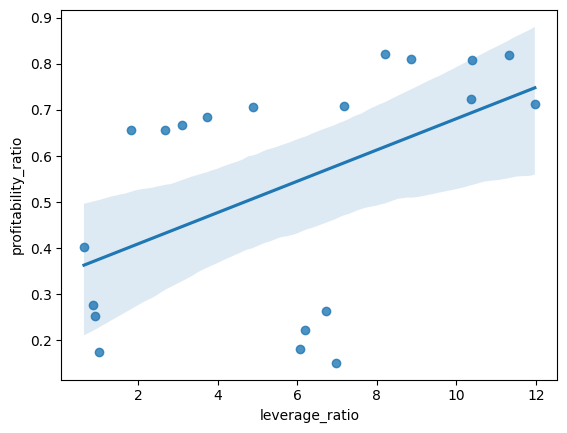

In [15]:
# Plot the leverage ratio on x-axis and profitability on y axis to see if real estate companies with higher leverage ratio have  higher profitability
df_real_est = df_ratios.loc[df_ratios["comp_type"]=="real_est"]
plot = sns.regplot(data=df_real_est, x="leverage_ratio", y="profitability_ratio")
relationship = "positive"

In [16]:
# jupyter nbconvert --to html hedge-fund-financial-report.ipynb

## Stock Portfolio Optimization

Use the `faang_stocks.csv` dataset to complete the following analysis:

1. What are the expected returns and the annualized Sharpe ratio of an equally-weighted portfolio? Assume the risk-free rate is 0% and store your answers as a float variables called benchmark_exp_return and benchmark_sharpe_ratio.

2. Find a portfolio that minimizes volatility. Use mean-variance optimization. Store the volatility of the portfolio as a float variable called mv_portfolio_vol. Store the portfolio weights as a pandas Series called `mv_portfolio`. Use the tickers as index.

3. Find a portfolio that maximizes the Sharpe ratio. Use mean-variance optimization and keep the risk-free rate at 0%. Store the Sharpe ratio (annualized) of the portfolio as a float variable called ms_portfolio_sharpe. Store the portfolio weights as a pandas Series called ms_portfolio. Use the tickers as index.

<br>

Asset allocation is the most important decision that any investor needs to face. They need to decide how to spread their total capital over certain assets (in this case, stocks). When considering the allocation, the investor wants to balance the risk and the potential reward. At the same time, the allocation depends on factors such as individual goals, risk tolerance, and the investment horizon.

The key framework used in asset allocation is the Modern Portfolio Theory (MPT), which was introduced by the Nobel Prize winner Harry Markowitz. MPT describes how investors can construct portfolios to maximize their expected returns for a given level of risk or, conversely, minimize risk for a given level of expected return. The mathematical framework used to achieve this is called mean-variance optimization.

The main insight from MPT is that investors should not evaluate an asset’s performance alone. Instead, they should evaluate how it would impact the performance of a portfolio of assets. Another important takeaway is the concept of diversification, which means that owning different kinds of assets reduces risk. That is because the loss or gain of a particular security has less impact on the overall portfolio’s performance.

<br>

In the dynamic realm of finance, data scientists/analysts are often tasked with finding optimal investment strategies. Imagine you're one such analyst, and you were asked to build an effective portfolio comprising FAANG stocks – Facebook (Meta), Apple, Amazon, Netflix, and Google. The goal is to maximize returns while mitigating risk.

You are tasked to find the optimal allocation to the FAANG stocks based on historical stock price data spanning the years 2020-2023. The dataset is stored in the `faang_stocks.csv` file. For each trading day, it contains the close prices of the five tech companies.


In [17]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [18]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [19]:
# Setting the plotting style to be colorblind-friendly
# plt.style.use("seaborn-v0_8-colorblind")
# plt.style.use("dark_background")
plt.style.use("seaborn-v0_8-dark-palette")


# Loading data
stock_prices_df = pd.read_csv("../data_raw/faang_stocks.csv", index_col="Date")

# Changing the index to a datetime type allows for easier filtering and plotting.
stock_prices_df.index = pd.to_datetime(stock_prices_df.index)
stock_prices_df

,AAPL,AMZN,GOOGL,META,NFLX
Date,,,,,
2020-01-02,75.09,94.90,68.43,209.78,329.81
2020-01-03,74.36,93.75,68.08,208.67,325.90
2020-01-06,74.95,95.14,69.89,212.60,335.83
2020-01-07,74.60,95.34,69.76,213.06,330.75
2020-01-08,75.80,94.60,70.25,215.22,339.26
...,...,...,...,...,...
2023-12-22,193.60,153.42,141.49,353.39,486.76
2023-12-26,193.05,153.41,141.52,354.83,491.19
2023-12-27,193.15,153.34,140.37,357.83,491.79


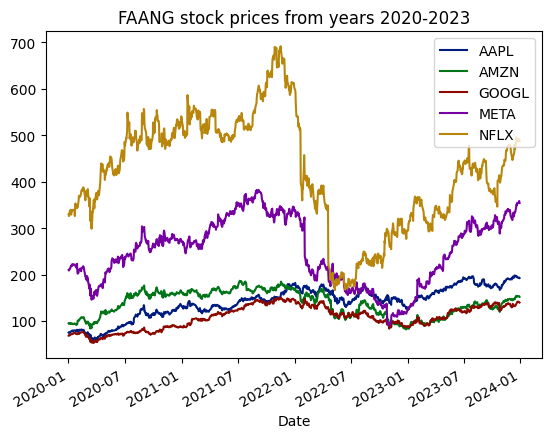

In [20]:
# Plotting the stock prices
stock_prices_df.plot(title="FAANG stock prices from years 2020-2023");

In [29]:
# Task 1 ---------------------------------------------------

# Calculate returns
returns_df = stock_prices_df.pct_change().dropna()

# Calculate the 1/n portfolio weights
portfolio_weights = 5 * [0.2]

# Calculate the portfolio returns of the 1/n portfolio
portfolio_returns = returns_df.dot(portfolio_weights)

# Calculate the expected portfolio return
benchmark_exp_return = portfolio_returns.mean()

# Calculate the portfolio's Sharpe ratio
benchmark_sharpe_ratio = (
    portfolio_returns.mean() / portfolio_returns.std() * np.sqrt(252)
)


print(f"Expected portfolio return: {benchmark_exp_return:.2%}")
print(f"Portfolio Sharpe ratio: {benchmark_sharpe_ratio:.2f}")

Expected portfolio return: 0.09%
Portfolio Sharpe ratio: 0.72


In [30]:
# Task 2 ---------------------------------------------------

# Calculate the annualized expected returns and the covariance matrix
avg_returns = returns_df.mean() * 252
cov_mat = returns_df.cov() * 252

# Instantiate the EfficientFrontier object
ef = EfficientFrontier(avg_returns, cov_mat)

# Find the weights that maximize the Sharpe ratio
weights = ef.min_volatility()
mv_portfolio = pd.Series(weights)

# Find the minimized volatility
mv_portfolio_vol = ef.portfolio_performance(risk_free_rate=0)[1]

print(f"Minimum volatility portfolio weights:\n{mv_portfolio}")
print(f"Minimum volatility portfolio volatility: {mv_portfolio_vol:.2%}")

Minimum volatility portfolio weights:
AAPL     0.398420
AMZN     0.149108
GOOGL    0.382898
META     0.000000
NFLX     0.069574
dtype: float64
Minimum volatility portfolio volatility: 30.31%


In [23]:
# Task 2 - alternative solution ----------------------------

# # Calculate the annualized expected returns and the covariance matrix
# avg_returns = returns_df.mean() * 252
# cov_mat = returns_df.cov() * 252

# # Define the function to find the portfolio volatility using the weights and the covariance matrix
# def get_portfolio_volatility(weights, cov_mat):
#     return np.sqrt(np.dot(weights.T, np.dot(cov_mat, weights)))
  
# # Define the number of assets
# n_assets = len(avg_returns)

# # Define the bounds - the weights can be between 0 and 1
# bounds = tuple((0, 1) for asset in range(n_assets))

# # Define the initial guess - the equally weighted portfolio
# initial_guess = n_assets * [1.0 / n_assets]

# # Define the constraint - all weights must add up to 1
# constr = {"type": "eq", "fun": lambda x: np.sum(x) - 1}

# # Find the minimum volatility portfolio
# result = sco.minimize(
#     get_portfolio_volatility,
#     x0=initial_guess,
#     args=cov_mat,
#     method="SLSQP",
#     constraints=constr,
#     bounds=bounds,
# )

# # Store the portfolio weights
# mv_portfolio = pd.Series(result.x, index=avg_returns.index).round(2)

# # Store the portfolio's volatility
# mv_portfolio_vol = result.fun


In [31]:
# Task 3 ---------------------------------------------------

# Alternative approach to get the expected returns and the covariance matrix
# avg_returns = expected_returns.mean_historical_return(stock_prices_df, compounding=False)
# cov_mat = risk_models.sample_cov(stock_prices_df)

# Instantiate the EfficientFrontier object
ef = EfficientFrontier(avg_returns, cov_mat)

# Find the weights that maximize the Sharpe ratio
weights = ef.max_sharpe(risk_free_rate=0)
ms_portfolio = pd.Series(weights)

# Find the maximized Sharpe ratio
ms_portfolio_sharpe = ef.portfolio_performance(risk_free_rate=0)[2]

print(f"Maximized Sharpe ratio portfolio weights:\n{ms_portfolio}")
print(f"Maximized Sharpe ratio portfolio Sharpe ratio: {ms_portfolio_sharpe:.2f}")

Maximized Sharpe ratio portfolio weights:
AAPL     0.787440
AMZN     0.000000
GOOGL    0.199698
META     0.000000
NFLX     0.012861
dtype: float64
Maximized Sharpe ratio portfolio Sharpe ratio: 0.88


In [25]:
# jupyter nbconvert --to html stock-portfolio-analysis.ipynb